# Mobile App: users segmentation

**Context**: "Unnecessaries" is an App for viewing and posting local advertisements. "Unnecessaries: Someone needs your unnessesary stuff!"\
**Project Goal**: Identify User groups based on their behavior and state recommendations to ensure Conversion in the target event growth.

## Data Processing and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab as pl
from datetime import datetime, timedelta
pd.set_option('display.max_colwidth', None)
import math as mth
from statsmodels. stats.weightstats import ztest as ztest

In [2]:
sources = pd.read_csv('/datasets/mobile_sources.csv')
dataset = pd.read_csv('/datasets/mobile_dataset.csv')

### Sources table

In [3]:
for df in [sources]:
    display(df.head(5)),
    display(df.info()),
    display(df.describe())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

,userId,source
count,4293,4293
unique,4293,3
top,c022dd40-5c23-404b-8fa0-21cc1768f30b,yandex
freq,1,1934


In [4]:
sources.rename(columns={'userId':'user_id'}, inplace=True)

- Table contetnts 4293 rows.
- No gaps detected.

### Dataset log

In [5]:
for df in [dataset]:
    display(df.head(5)),
    display(df.info()),
    display(df.describe())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-11-01 21:29:25.871595,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


In [6]:
dataset.rename(columns={'event.time':'event_time','event.name':'event_name','user.id':'user_id'}, inplace=True)

In [7]:
dataset['event_time'] = dataset['event_time'].apply(pd.to_datetime).round('s')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


- Table contetnts 74197 rows.
- No gaps detected.
- Datatype for 'event_time' coorrected.

### Merging "contacts_show" & "show_contacts"

In [8]:
dataset.loc[dataset['event_name'] == "contacts_show", 'event_name'] = "show_contacts"

### Merging "search_1" - "search_7"

In [9]:
def events_type(i):
    if 'search' in i:
        new_name = 'search'
        return new_name
    return i

df['event_name'] = df['event_name'].apply(events_type)

### Duplicates

#### Sources table

In [10]:
print('Duplicates detected -', sources.duplicated().sum())

Duplicates detected - 0


In [11]:
print('Implicit duplicates detected -', sources['user_id'].duplicated().sum())

Implicit duplicates detected - 0


#### Dataset log

In [12]:
print('Duplicates detected -', dataset.duplicated().sum())

Duplicates detected - 1190


In [13]:
duplicates = dataset[dataset.duplicated(['user_id', 'event_time'])]
print('Implicit duplicates detected -', len(duplicates))

Implicit duplicates detected - 1257


### Merging Data

In [14]:
print('Number of users in Dataset log -', len(dataset['user_id'].unique()))

Number of users in Dataset log - 4293


Number of unique users in both logs is equal.

In [15]:
df = dataset.merge(sources, on='user_id', how = 'right')
df.head(5)

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


### Timeframe and  Integrity

In [16]:
df['date'] = pd.to_datetime(df['event_time'].dt.date)
df.head(5)

,event_time,event_name,user_id,source,date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07


In [17]:
date_pivot = df.pivot_table(index =['date'], values = 'event_name', aggfunc = 'count')
date_pivot = date_pivot.rename(columns = {'event_name':'num_events'})
date_pivot.describe()

,num_events
count,28.000000
mean,2649.892857
std,408.920742
min,1843.000000
25%,2457.000000
50%,2725.000000
75%,2884.750000
max,3360.000000


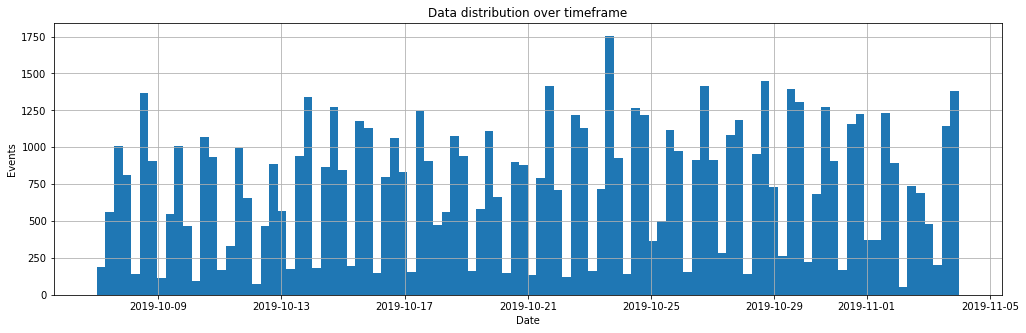

In [18]:
plt.figure(figsize=(17,5))
df['event_time'].hist(bins=100)
plt.title('Data distribution over timeframe')
pl.xlabel("Date")
pl.ylabel("Events")
plt.show()

 - Timeframe: 7th October - 3th November.
 - Data is integral throughout the presented timeframe.

## Metrics evaluation

### Retention rate

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   date        74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.4+ MB


In [20]:
df['session'] =  pd.to_datetime(df['event_time'].dt.date)


first_date_pivot = df.pivot_table(index ='user_id', values = 'session', aggfunc = 'min')
first_date_pivot = first_date_pivot.rename(columns = {'session':'session_start'})
first_date_pivot = first_date_pivot.reset_index()


df = df.merge(first_date_pivot, on='user_id', how = 'right')


df['lifetime'] = (
    df['session'] - df['session_start']
).dt.days


df_grouped = df.pivot_table(
    index=['session_start'], columns='lifetime', values='user_id', aggfunc='nunique'
)


cohort_sizes = (
    df.groupby('session_start')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

df_grouped = cohort_sizes.merge(
    df_grouped, on='session_start', how='left'
).fillna(0)



df_grouped = df_grouped.div(
    df_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])


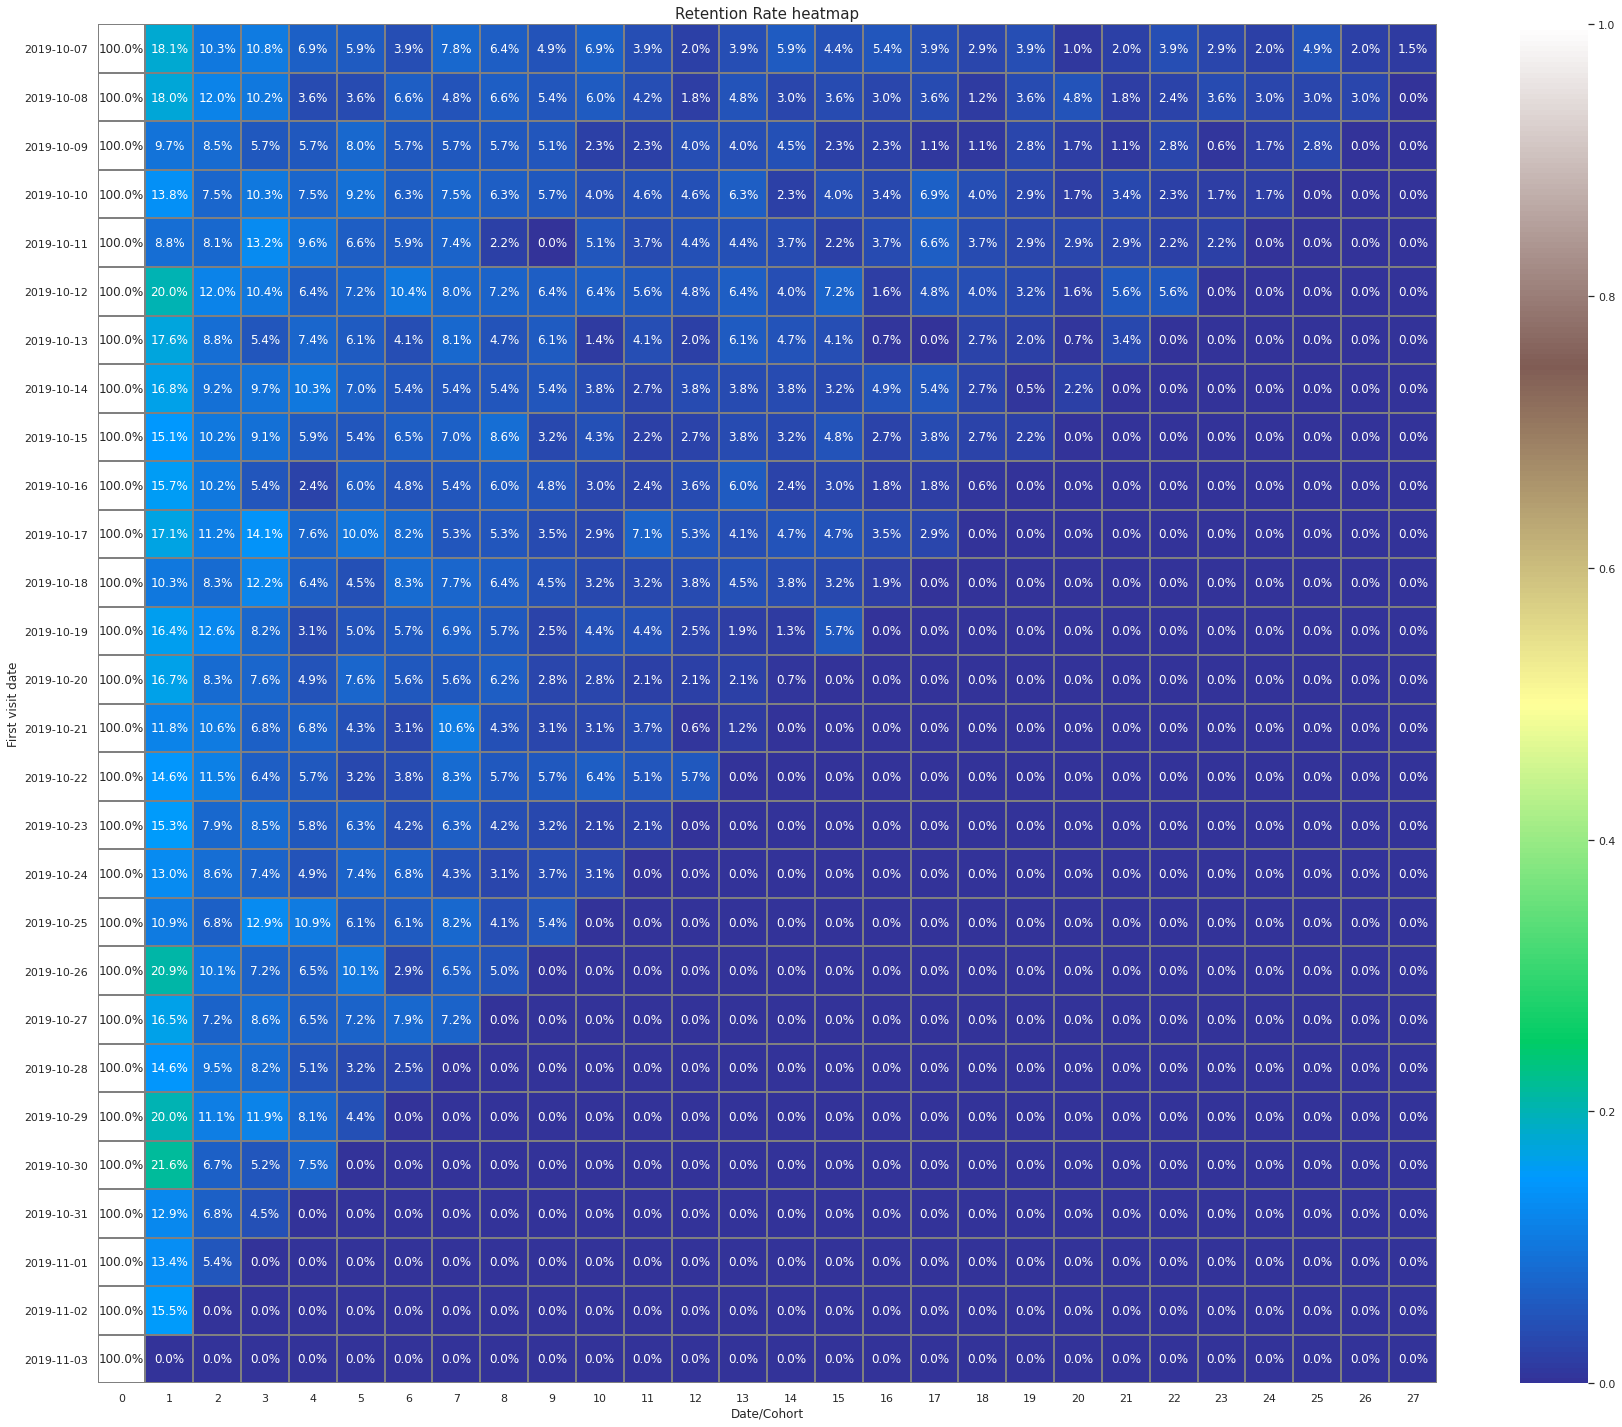

In [21]:
sns.set(style='whitegrid')
plt.figure(figsize=(30, 25))
sns.heatmap(df_grouped, cmap="terrain", annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.title('Retention Rate heatmap', fontsize = 15)
plt.yticks(np.arange(0.5, 28, 1), df_grouped.index.date)
plt.xlabel('Date/Cohort')
plt.ylabel('First visit date')
plt.show()

Retention Rate is on peak on the day one for Cohorts, that started on 10th October, 26th October and 30th October.

### Time spent in App

In [22]:
user_pivot = df.pivot_table(index =['user_id', 'date'], values = ['event_time'], aggfunc = ['max', 'min'])
user_pivot.columns = ['max_time','min_time']
user_pivot['max_time'] = pd.to_datetime(user_pivot['max_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')
user_pivot['min_time'] = pd.to_datetime(user_pivot['min_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')
user_pivot['session_time_seconds'] = ((user_pivot['max_time'] - user_pivot['min_time']).dt.total_seconds()).round(2)
user_pivot = user_pivot.reset_index()
user_pivot


,user_id,date,max_time,min_time,session_time_seconds
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:42,2019-10-07 13:39:46,596.0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:42:23,2019-10-09 18:33:56,507.0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 20:07:30,2019-10-21 19:52:31,899.0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:30:53,2019-10-22 11:18:15,758.0
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:59:55,2019-10-19 21:34:34,1521.0
...,...,...,...,...,...
7812,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-29,2019-10-29 16:13:01,2019-10-29 13:58:48,8053.0
7813,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-30,2019-10-30 11:31:46,2019-10-30 00:15:43,40563.0
7814,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-01,2019-11-01 00:24:53,2019-11-01 00:24:31,22.0
7815,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,2019-11-02 19:30:50,2019-11-02 01:16:49,65641.0


In [23]:
user_pivot_filtered = user_pivot.query('session_time_seconds != 0')


In [24]:
user_pivot_95_percentile = round(np.percentile (user_pivot_filtered['session_time_seconds'], 95))
print('No more thаn 5% sessions lasts longer than ', user_pivot_95_percentile, 'seconds')


No more thаn 5% sessions lasts longer than  32192 seconds


In [25]:
user_pivot_5_percentile = round(np.percentile (user_pivot_filtered['session_time_seconds'], 5))
print('No more thаn 5% sessions lasts less than ', user_pivot_5_percentile, 'seconds')


No more thаn 5% sessions lasts less than  42 seconds


In [26]:
user_pivot_filtered = user_pivot_filtered.query('session_time_seconds < 32183 & session_time_seconds > 42')
user_pivot_filtered.describe()


,session_time_seconds
count,6120.000000
mean,3632.092974
std,6231.215728
min,43.000000
25%,360.000000
50%,999.500000
75%,3161.500000
max,32040.000000


For one session users spend in the App:
 - min 43 seconds;
 - max - 32040 seconds or almost 9 hours.
 - median - 16,5 minutes, mean - slightly more than 1 hour.
 
It seems to be a good idea to take a closer look at what is the difference in Retention Rate for users who spend different amounts of time in the App.

### Events Frequency

In [27]:
activities_pivot = df.pivot_table(index =['event_name'], values = ['event_time'], aggfunc = ['count'])
activities_pivot.columns = ['count']
activities_pivot = activities_pivot.sort_values(by='count', ascending=False)
activities_pivot = activities_pivot.reset_index()
activities_pivot


,event_name,count
0,tips_show,40055
1,photos_show,10012
2,search,6784
3,advert_open,6164
4,show_contacts,4529
5,map,3881
6,favorites_add,1417
7,tips_click,814
8,contacts_call,541


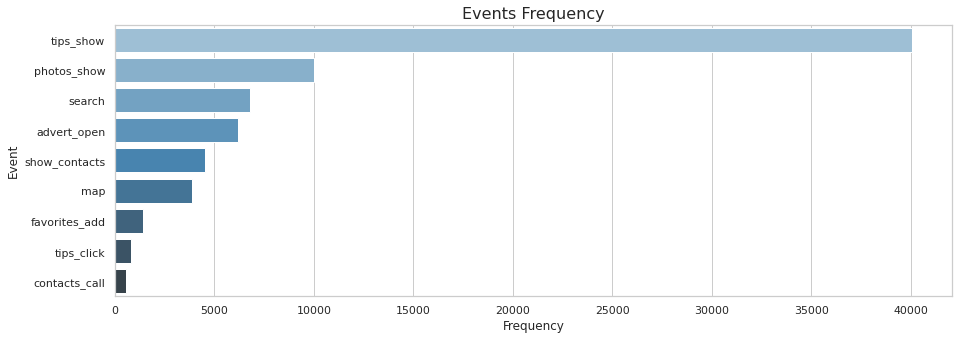

In [28]:
activities_pivot = activities_pivot.sort_values(by='count', ascending=False)
f, ax = plt.subplots(figsize=(15, 5))

ax = sns.barplot(data = activities_pivot, x = 'count', y = 'event_name', palette = "Blues_d")
ax.set_xlabel('Frequency')
ax.set_ylabel('Event')
ax.set_title('Events Frequency' , fontsize=16)
plt.show()


In [29]:
activities_user_pivot = df.pivot_table(index =['event_name'], values = ['user_id'], aggfunc = ['nunique'])
activities_user_pivot.columns = ['unique_users']
activities_user_pivot = activities_user_pivot.sort_values(by='unique_users', ascending=False)
activities_user_pivot = activities_user_pivot.reset_index()
activities_user_pivot


,event_name,unique_users
0,tips_show,2801
1,search,1666
2,map,1456
3,photos_show,1095
4,show_contacts,981
5,advert_open,751
6,favorites_add,351
7,tips_click,322
8,contacts_call,213


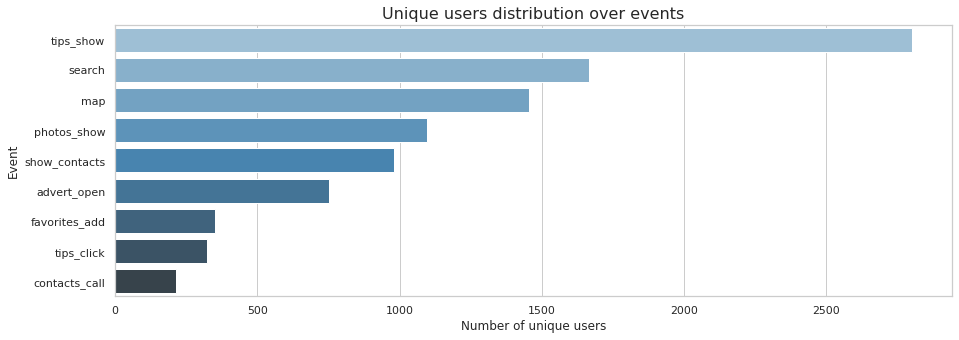

In [30]:
activities_user_pivot = activities_user_pivot.sort_values(by='unique_users', ascending=False)
f, ax = plt.subplots(figsize=(15, 5))

ax = sns.barplot(data = activities_user_pivot, x = 'unique_users', y = 'event_name', palette = "Blues_d")
ax.set_xlabel('Number of unique users')
ax.set_ylabel('Event')
ax.set_title('Unique users distribution over events', fontsize=16)
plt.show()


In [31]:
user_activity_pivot = df.pivot_table(index =['user_id'], values = ['event_name'], aggfunc = ['count'])
user_activity_pivot.columns = ['count_activities']
user_activity_pivot = user_activity_pivot.sort_values(by='count_activities', ascending=False)
user_activity_pivot = user_activity_pivot.reset_index()
user_activity_pivot.describe()


,count_activities
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,478.000000


 - The most frequent event is "tips_show", the next one after a significant gap is "photos_show".\
The rarest events are "tips_cklick" и "contacts_call".\
Thus recommended advertisements are shown frequently, but it seems like users are not interested in them.


- The most frequent event for unique users are "tips_show" & "search", the least frequent - "tips_cklick" & "contacts_call".


- Max events performed by user - 487, min - 1, mean  - 17, median - 9.

### Conversion to target event — show_contacts

Let us make an assumption that the event "show_contacts" could happen only after "tips_show" or "advert_open".

In [32]:
other_events_query = df.query('event_name == "tips_show"' or 'event_name == "advert_open"')

In [33]:
event_pivot = other_events_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
event_pivot = event_pivot.reset_index()
event_pivot.columns = ['session','count_users_total']

In [34]:
show_contacts_query = df.query('event_name == "show_contacts"')

In [35]:
show_contacts_pivot = show_contacts_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
show_contacts_pivot = show_contacts_pivot.reset_index()
show_contacts_pivot.columns = ['session','count_users_show_contacts']

In [36]:
cr = show_contacts_pivot.merge(event_pivot, on='session', how = 'outer')
cr['cr'] = ((cr['count_users_show_contacts']/cr['count_users_total'])*100).round(2)
cr.drop(['session','count_users_show_contacts','count_users_total'], axis=1, inplace = True)
cr.describe()

,cr
count,28.000000
mean,31.055714
std,4.499262
min,23.780000
25%,27.565000
50%,30.065000
75%,33.067500
max,39.680000


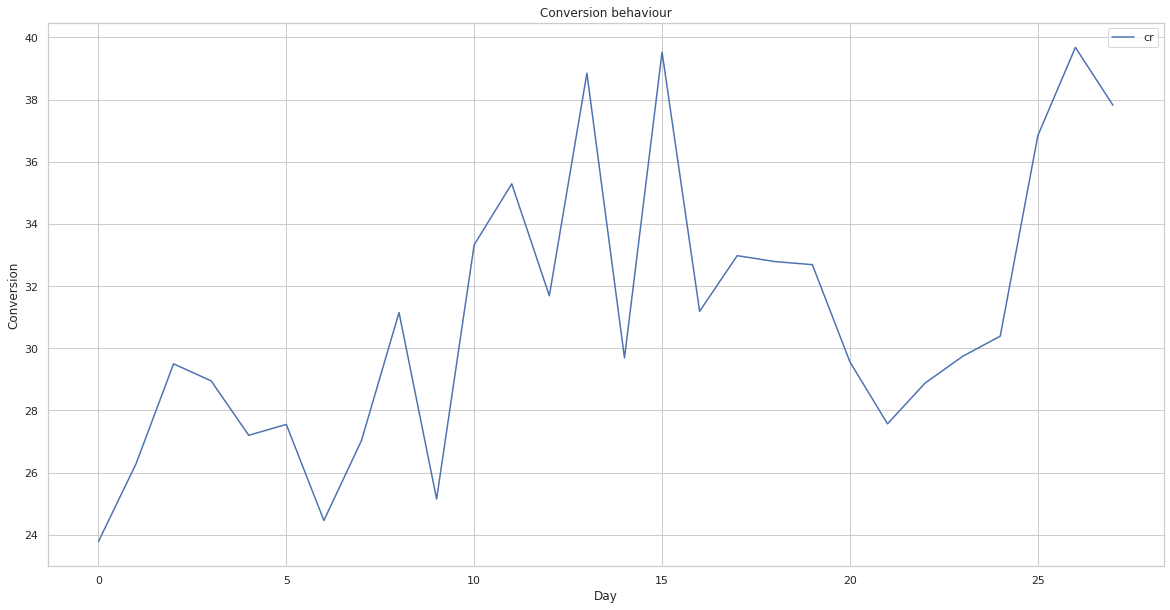

In [37]:
cr.plot(figsize=(20, 10), grid=True)
plt.title('Conversion behaviour')
plt.xlabel('Day')
plt.ylabel('Conversion')
plt.show()

In [38]:
cr_mean = cr['cr'].mean()
print('Mean Conversion Rate to the target event over timeframe - ', cr_mean.round(2), '%')

Mean Conversion Rate to the target event over timeframe -  31.06 %


- The Assumtion is made that the event "show_contacts" could happen only after "tips_show" or "advert_open".
- Min Conversion Rate - 24% is for Day one of the timeframe.
- Min Conversion Rate over the the timeframe - 40%, mean - 31%, median - 30%.

## Metrics evaluation by groups

### Events frequency

Let us divide users into gropes based on the performed events frequency.

In [39]:
user_activity_pivot['group_bin'] = pd.qcut(user_activity_pivot['count_activities'], 4)

In [40]:
user_sum_pivot_groups = user_activity_pivot.pivot_table(index =['group_bin'], values = ['user_id'], aggfunc = ['count']) 
user_sum_pivot_groups.columns = ['count_users']

user_sum_pivot_groups


,count_users
group_bin,
"(0.999, 5.0]",1140
"(5.0, 9.0]",1105
"(9.0, 17.0]",997
"(17.0, 478.0]",1051


### Time spent in App

Let us divide users into gropes based on the time thaey spent in the App.

In [41]:
user_sum_pivot = user_pivot_filtered.pivot_table(index =['user_id'], values = ['session_time_seconds'], aggfunc = ['sum'])
user_sum_pivot.columns = ['sum_time']
user_sum_pivot = user_sum_pivot.reset_index()
user_sum_pivot.describe()


,sum_time
count,4053.000000
mean,5484.433506
std,13100.831631
min,43.000000
25%,487.000000
50%,1300.000000
75%,4251.000000
max,302440.000000


In [42]:
user_sum_pivot['group_bin'] = pd.qcut(user_sum_pivot['sum_time'], 4)


user_sum_pivot_groups = user_sum_pivot.pivot_table(index =['group_bin'], values = ['user_id'], aggfunc = ['count']) 
user_sum_pivot_groups.columns = ['count_users']
user_sum_pivot_groups['bins'] = user_sum_pivot['group_bin'].unique().sort_values()
user_sum_pivot_groups['left'] = user_sum_pivot_groups['bins'].apply(lambda x: x.left)
user_sum_pivot_groups['right'] = user_sum_pivot_groups['bins'].apply(lambda x: x.right)
user_sum_pivot_groups.drop('bins', axis= 1 , inplace= True ) 
user_sum_pivot_groups


,count_users,left,right
group_bin,,,
"(42.999, 487.0]",1015,42.999,487.0
"(487.0, 1300.0]",1012,487.000,1300.0
"(1300.0, 4251.0]",1013,1300.000,4251.0
"(4251.0, 302440.0]",1013,4251.000,302440.0


Users spent in the App:
 - Group 1 - less than 8 minutes. 
 - Group 2 - from 8 up to 22 minutes.
 - Group 3 - from 22 minutes up to 1 hour and 20 minutes.
 - Group 4 - more than 1 hour and 20 minutes.

In [43]:
def query_data (i):
    left = user_sum_pivot_groups.iloc[i]['left']
    right = user_sum_pivot_groups.iloc[i]['right']
    result = user_sum_pivot.query('sum_time <= @right & sum_time > @left')
    return result

def segmentation (group):
    df_group = group.merge(df, on='user_id', how = 'left')
    return df_group

df_group_1 = segmentation (query_data (0))
df_group_2 = segmentation (query_data (1))
df_group_3 = segmentation (query_data (2))
df_group_4 = segmentation (query_data (3))

### Retention rate

In [44]:
def get_retention(group_data):
    group_data_grouped = group_data.pivot_table(
        index=['session_start'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        group_data.groupby('session_start')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
   
    group_data_grouped = cohort_sizes.merge(
        group_data_grouped, on='session_start', how='left'
    ).fillna(0)
    group_data_grouped = group_data_grouped.div(
        group_data_grouped['cohort_size'], axis=0
    ).drop(columns=['cohort_size'])
    
    return group_data_grouped    

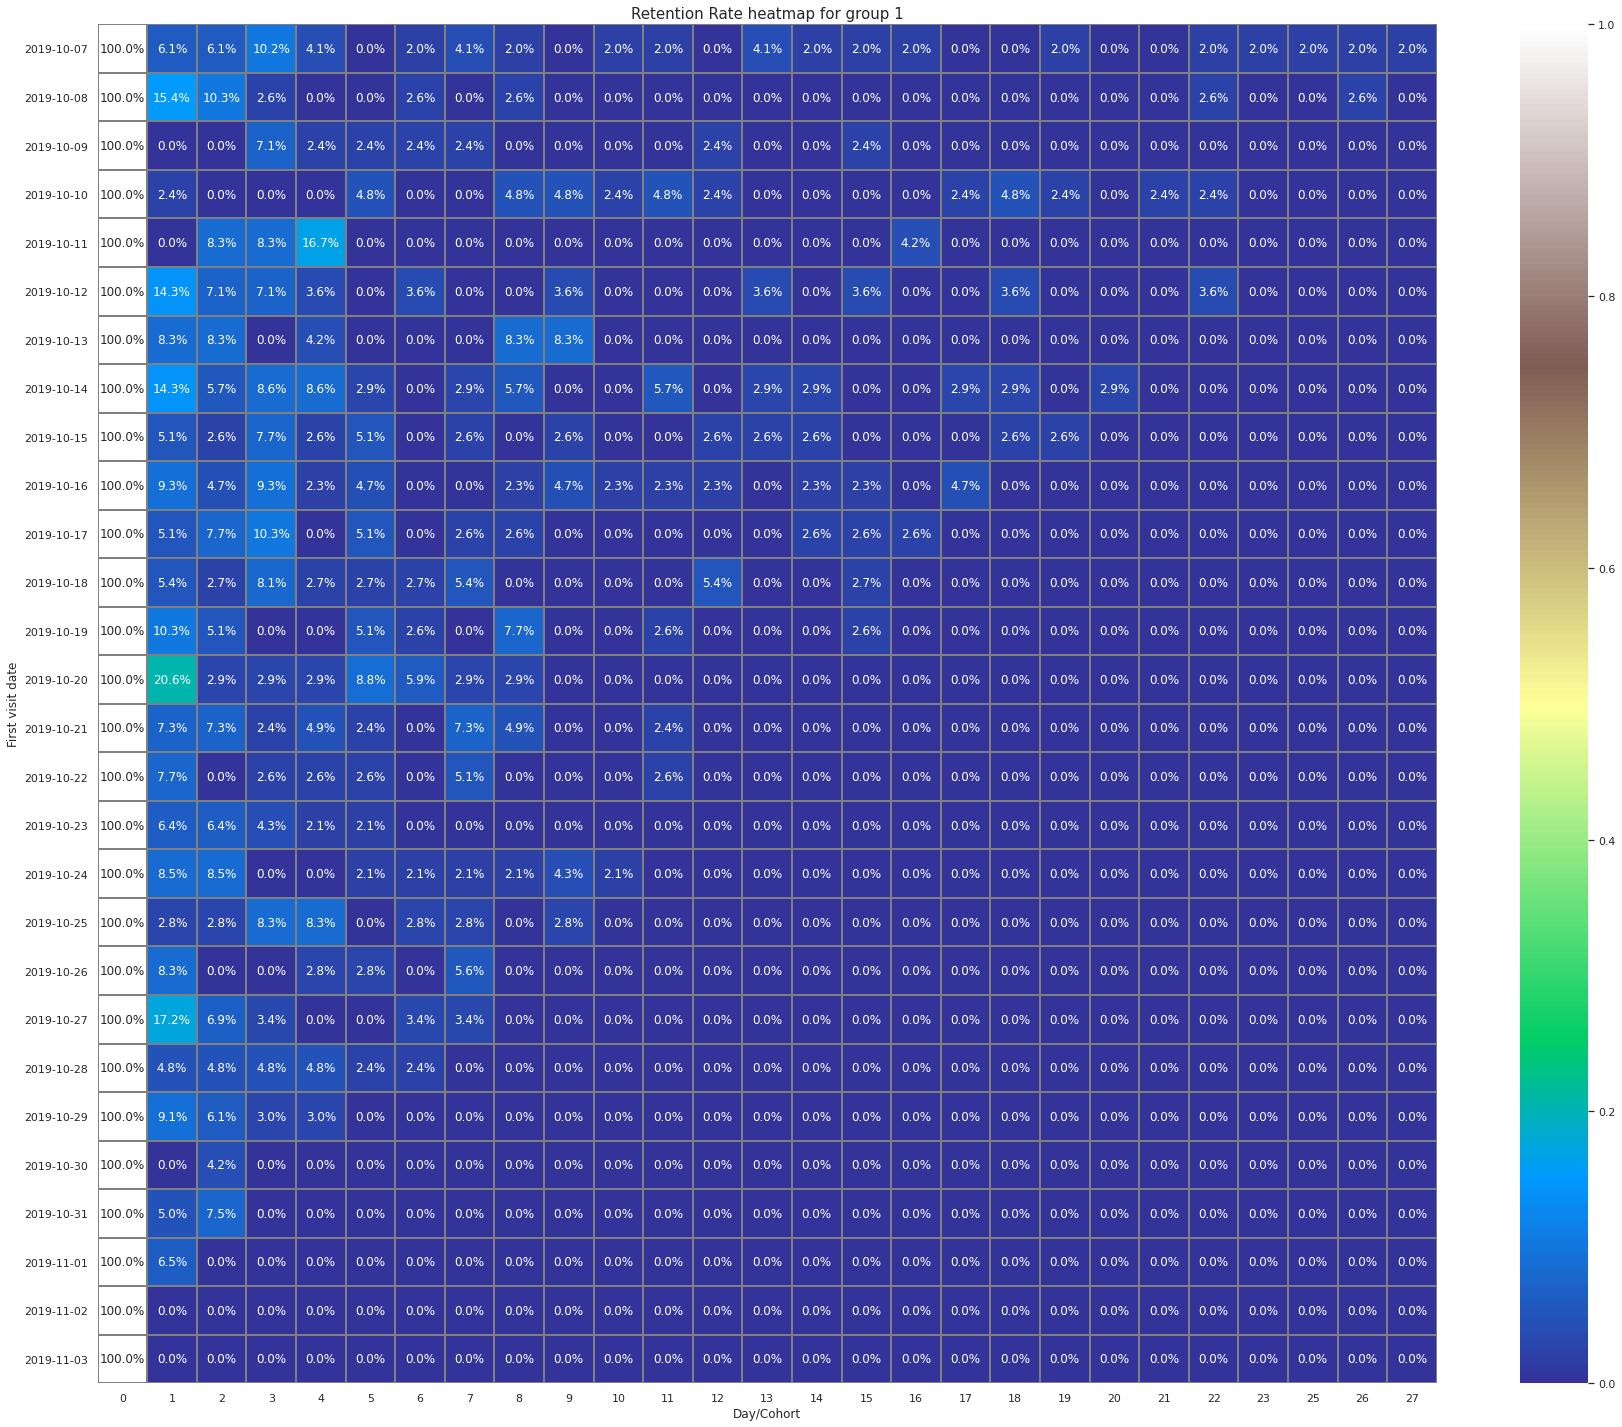

In [45]:
group_1_retention = get_retention(df_group_1)
sns.set(style='whitegrid')
plt.figure(figsize=(30, 25))
sns.heatmap(group_1_retention, cmap="terrain", annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.title('Retention Rate heatmap for group 1', fontsize = 15)
plt.xlabel('Day/Cohort')
plt.yticks(np.arange(0.5, 28, 1), df_grouped.index.date)
plt.ylabel('First visit date')
plt.show()

Retention Rate for users, that spent the least time in the App, is on peak on the day one for Cohort, that started on 20th October.

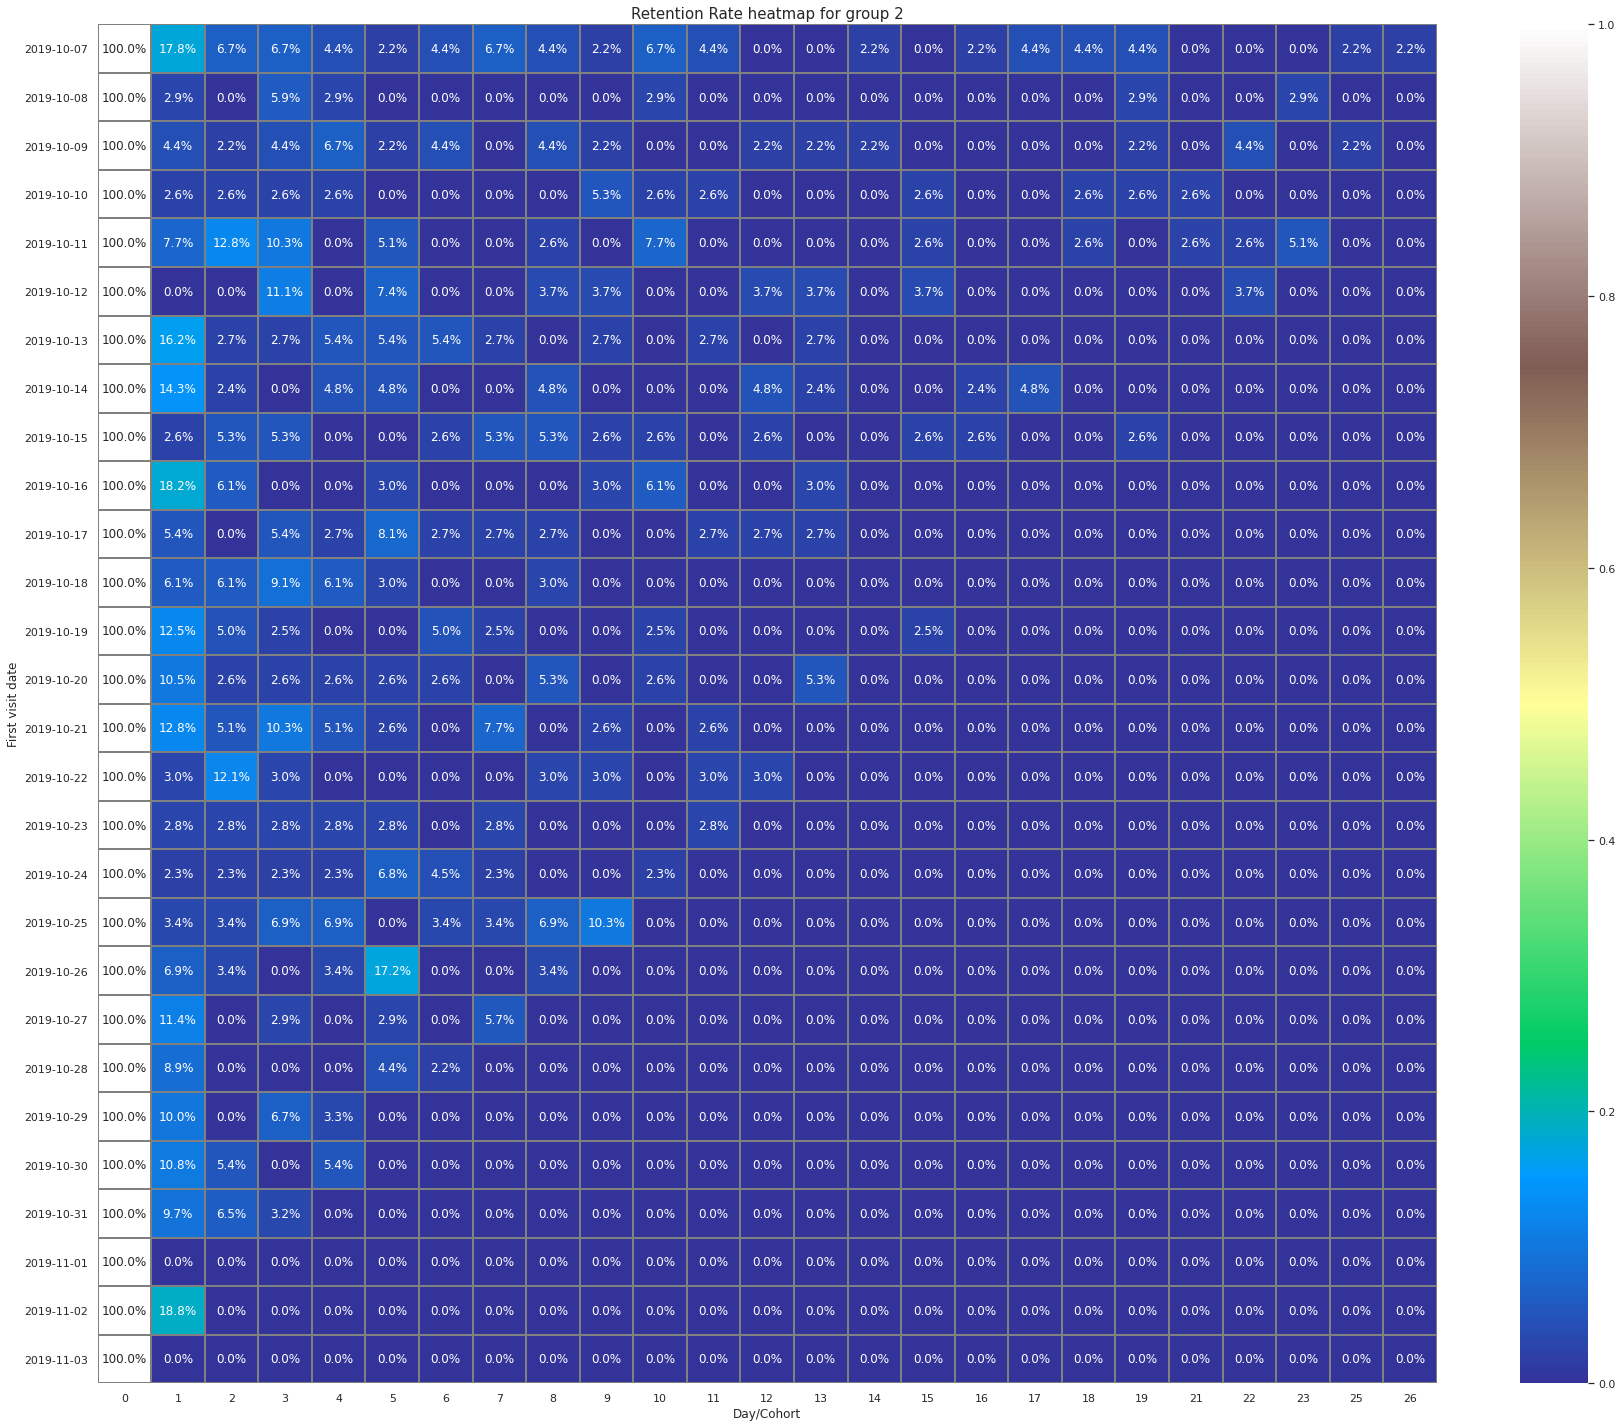

In [46]:
group_2_retention = get_retention(df_group_2)
sns.set(style='whitegrid')
plt.figure(figsize=(30, 25))
sns.heatmap(group_2_retention, cmap="terrain", annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.title('Retention Rate heatmap for group 2', fontsize = 15)
plt.xlabel('Day/Cohort')
plt.yticks(np.arange(0.5, 28, 1), df_grouped.index.date)
plt.ylabel('First visit date')
plt.show()

Retention Rate for users, that spent in the App 8-22 minutes, is on peak on the day one for Cohorts, that started on 16th October and 2nd November.

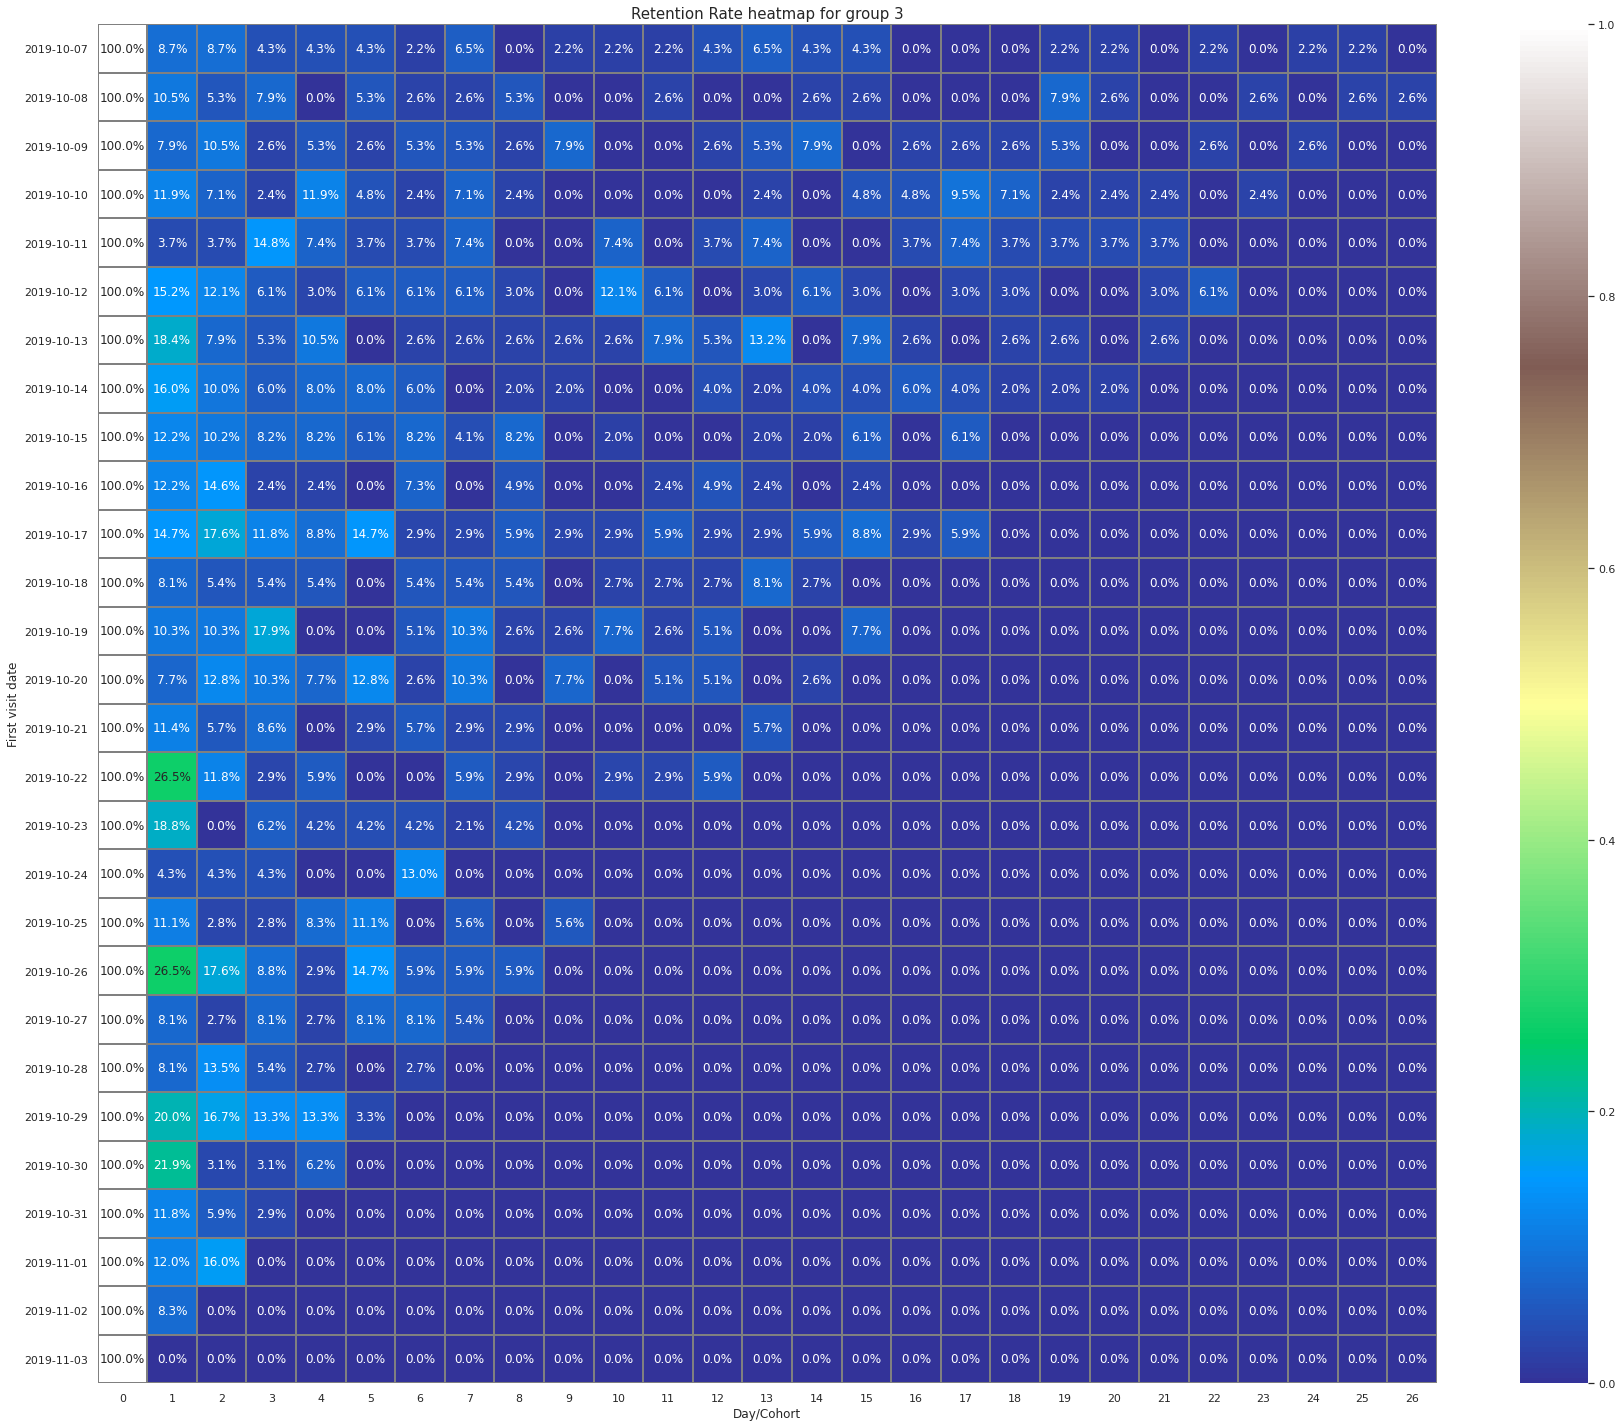

In [47]:
group_3_retention = get_retention(df_group_3)
sns.set(style='whitegrid')
plt.figure(figsize=(30, 25))
sns.heatmap(group_3_retention, cmap="terrain", annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.title('Retention Rate heatmap for group 3', fontsize = 15)
plt.xlabel('Day/Cohort')
plt.yticks(np.arange(0.5, 28, 1), df_grouped.index.date)
plt.ylabel('First visit date')
plt.show()

Retention Rate for users, that spent in the App 22 minutes to 1 hour 20 minutes, is on peak on the day one for Cohorts, that started on 22nd & 26th October.

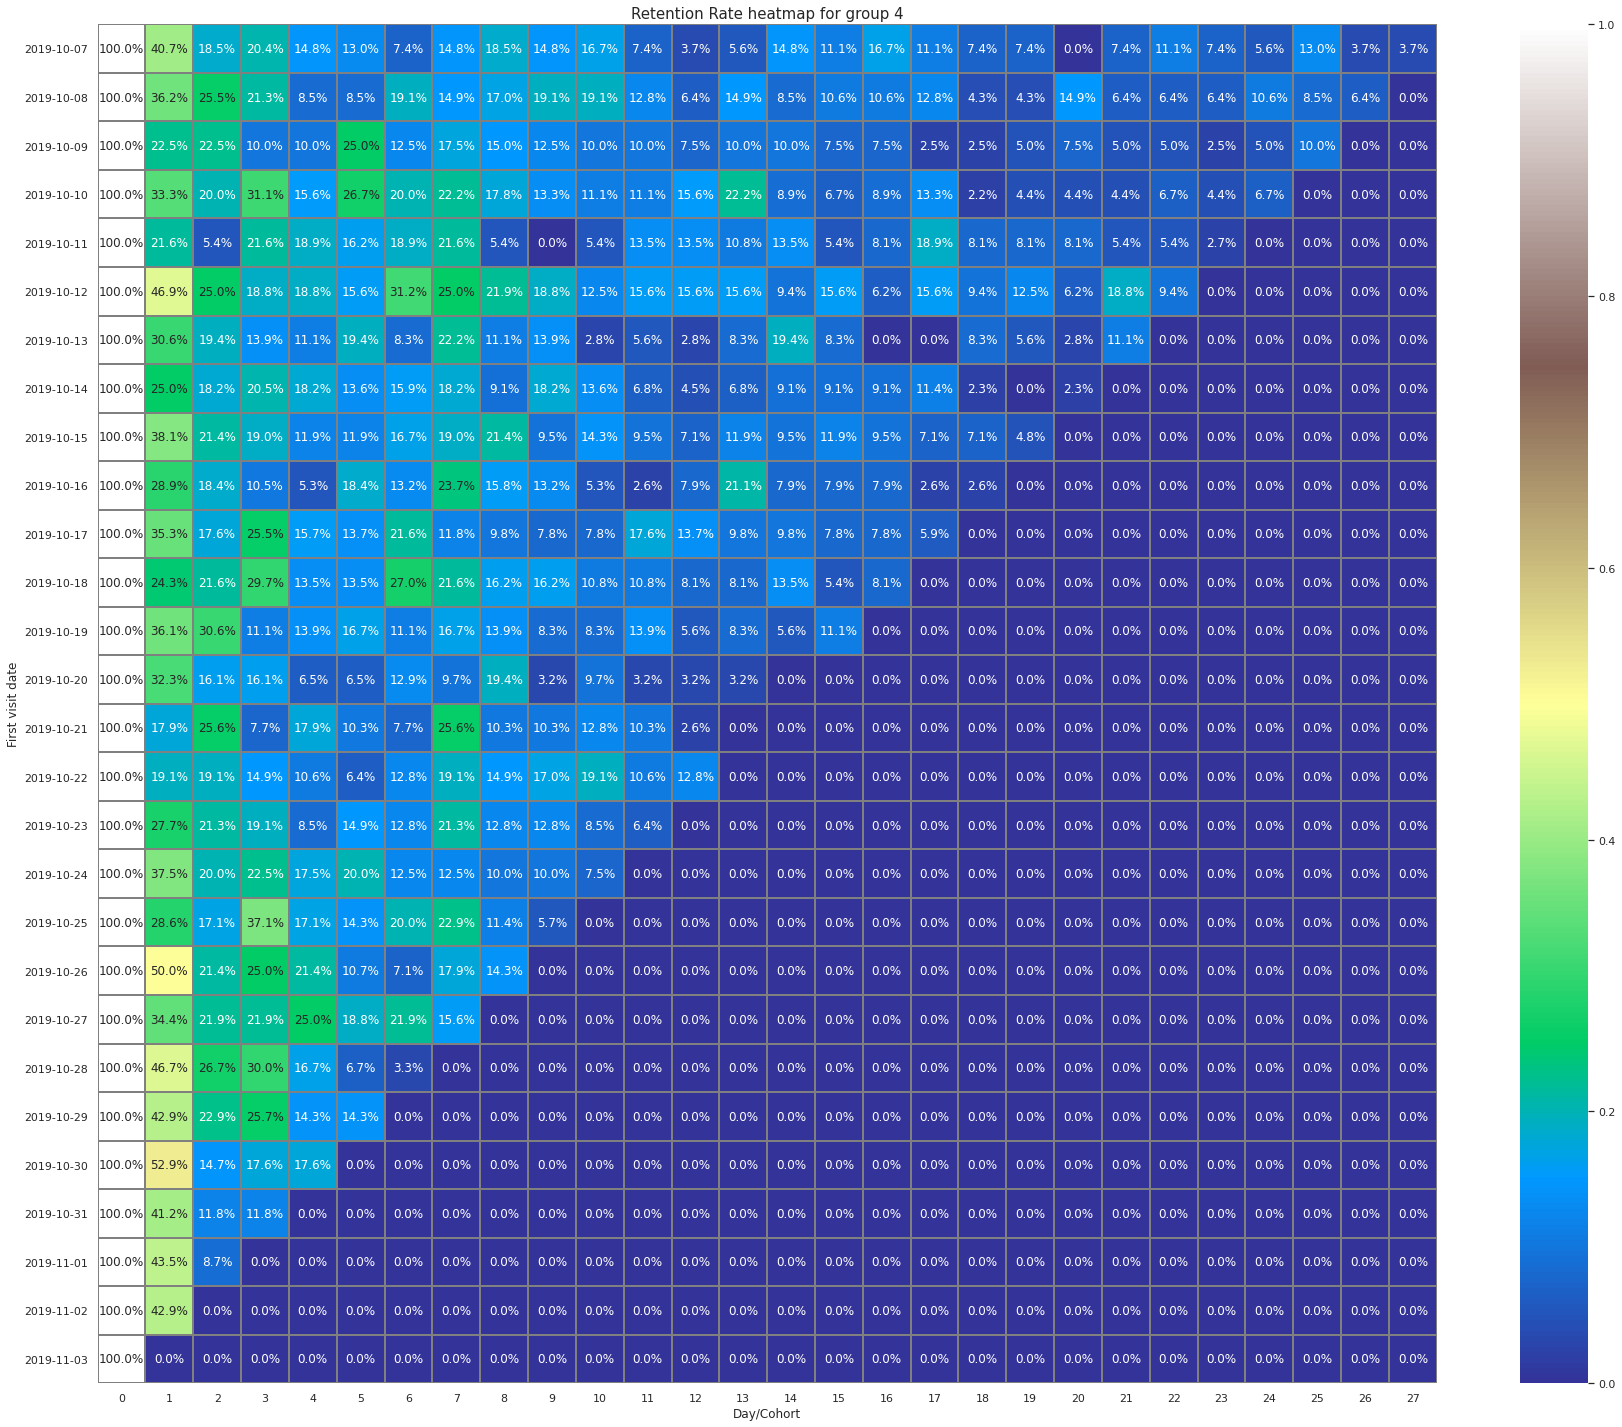

In [48]:
group_4_retention = get_retention(df_group_4)
sns.set(style='whitegrid')
plt.figure(figsize=(30, 25))
sns.heatmap(group_4_retention, cmap="terrain", annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.title('Retention Rate heatmap for group 4', fontsize = 15)
plt.xlabel('Day/Cohort')
plt.yticks(np.arange(0.5, 28, 1), df_grouped.index.date)
plt.ylabel('First visit date')
plt.show()

Retention Rate for users that spent more than 1 hour 20 minutes in the App, shows significantly greater numbers.

**Выводы:**
The highest Retention Rate is shown by the users that spent the greatest amount of time in the App. Even numbers for Day 21 are comparable to Day 1 for different groups.

### Conversion into target event

In [49]:
def get_cr(group_data):
    other_events_query = group_data.query('event_name == "tips_show"' or 'event_name == "advert_open"')
    event_pivot = other_events_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    event_pivot = event_pivot.reset_index()
    event_pivot.columns = ['session','count_users_total']
    show_contacts_query = group_data.query('event_name == "show_contacts"')
    show_contacts_pivot = show_contacts_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    show_contacts_pivot = show_contacts_pivot.reset_index()
    show_contacts_pivot.columns = ['session','count_users_show_contacts']
    cr = show_contacts_pivot.merge(event_pivot, on='session', how = 'outer')
    cr['cr'] = ((cr['count_users_show_contacts']/cr['count_users_total'])*100).round(2)
    cr.drop(['session','count_users_show_contacts','count_users_total'], axis=1, inplace = True)
    return cr

In [50]:
group_1_cr = get_cr(df_group_1)
group_2_cr = get_cr(df_group_2)
group_3_cr = get_cr(df_group_3)
group_4_cr = get_cr(df_group_4)

In [51]:
df_cr = pd.concat([group_1_cr, group_2_cr, group_3_cr, group_4_cr], axis=1)
df_cr.columns = ['group_1','group_2','group_3','group_4']

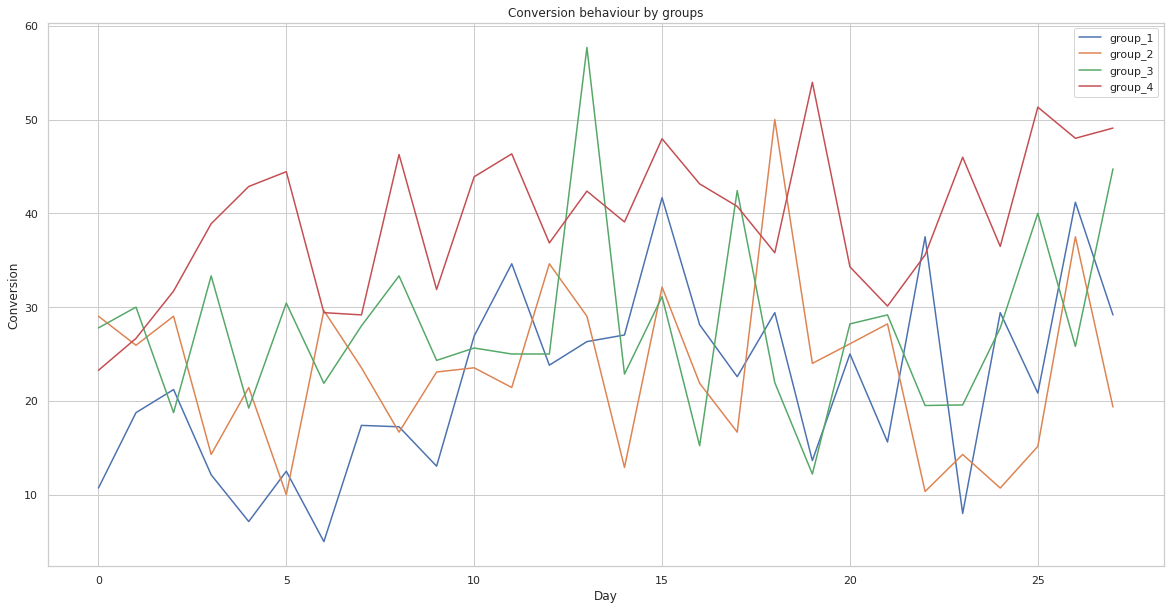

In [52]:
df_cr.plot(figsize=(20, 10), grid=True)
plt.title('Conversion behaviour by groups')
plt.xlabel('Day')
plt.ylabel('Conversion')
plt.show()

Users from Group 4 show the highest Conversion flow rate, users from Group 1 - the lowest Conversion flow rate among the timeframe.

## Statistical hypotheses testing

### Hypothesis: users from source "yandex",  and users from source "google" demonstrate difference in target event Conversion rate

*Hypothesis H0* - users from source "yandex",  and users from source "google" demonstrate equal Conversion rate in target event\
*Hypothesis H1* - users from source "yandex",  and users from source "google" demonstrate different Conversion rate in target event

In [53]:
df_yandex = df.query('source == "yandex"')
df_google = df.query('source == "google"')


In [54]:
def get_num_users_oe (source_data):
    other_events_query = source_data.query('event_name == "tips_show"' or 'event_name == "advert_open"')
    event_pivot = other_events_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    event_pivot = event_pivot.reset_index()
    event_pivot.columns = ['session','count_users_total']
    num_users_other_events = event_pivot['count_users_total'].sum()
    return num_users_other_events

def get_num_users_sc (source_data):
    show_contacts_query = source_data.query('event_name == "show_contacts"')
    show_contacts_pivot = show_contacts_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    show_contacts_pivot = show_contacts_pivot.reset_index()
    show_contacts_pivot.columns = ['session','count_users_show_contacts']
    num_users_show_contacts = show_contacts_pivot['count_users_show_contacts'].sum()
    return num_users_show_contacts

yandex_num_users_oe = get_num_users_oe(df_yandex)
google_num_users_oe = get_num_users_oe(df_google)
yandex_num_users_cs = get_num_users_sc(df_yandex)
google_num_users_cs = get_num_users_sc(df_google)

In [55]:
alpha = 0.05  

success = np.array([yandex_num_users_cs, google_num_users_cs])
conditions = np.array([yandex_num_users_oe, google_num_users_oe])
p1 = success[0]/conditions[0]
p2 = success[1]/conditions[1]
print(success[0], success[1], conditions[0], conditions[1])
p_combined = (success[0] + success[1]) / (conditions[0] + conditions[1])
difference = p1 - p2 # ваш код
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/conditions[0] + 1/conditions[1]))# ваш код
distr = st.norm(0, 1)
p_value = p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-value: ', p_value)
if p_value < alpha:
    print('Discard null hypothesis')
else:
    print(
        'Null hypothesis could not be discard'
    )

657 433 2174 1082
p-value:  2.3993726561144513e-08
Discard null hypothesis


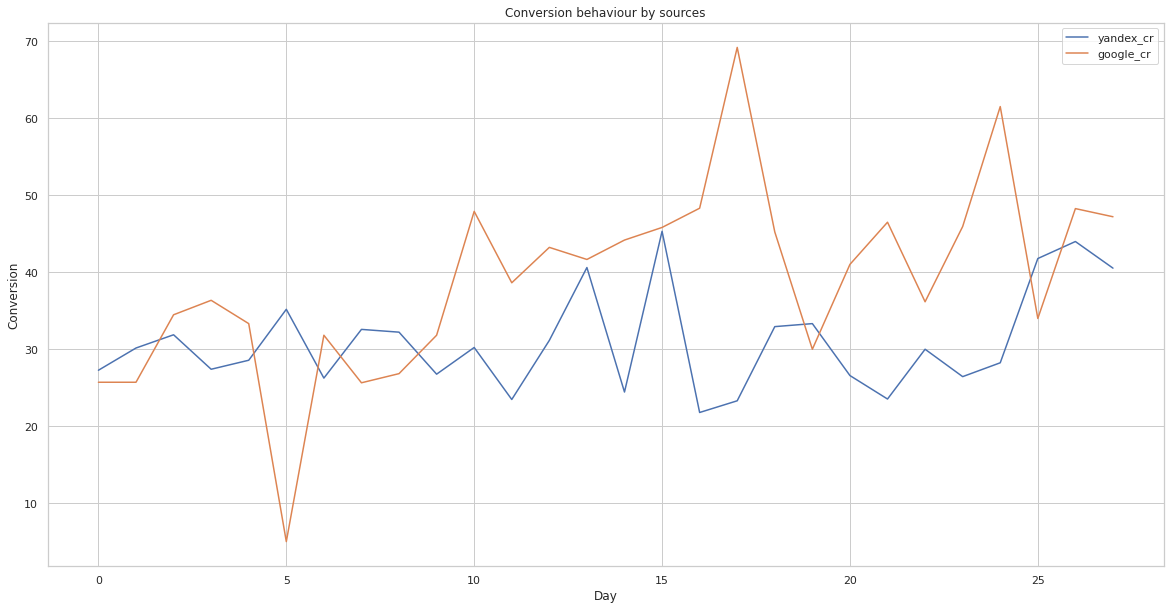

In [56]:
def get_cr_2(source_data):
    other_events_query = source_data.query('event_name == "tips_show"' or 'event_name == "advert_open"')
    event_pivot = other_events_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    event_pivot = event_pivot.reset_index()
    event_pivot.columns = ['session','count_users_total']
    show_contacts_query = source_data.query('event_name == "show_contacts"')
    show_contacts_pivot = show_contacts_query.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    show_contacts_pivot = show_contacts_pivot.reset_index()
    show_contacts_pivot.columns = ['session','count_users_show_contacts']
    cr = show_contacts_pivot.merge(event_pivot, on='session', how = 'outer')
    cr['cr'] = ((cr['count_users_show_contacts']/cr['count_users_total'])*100).round(2)
    cr.drop(['session','count_users_show_contacts','count_users_total'], axis=1, inplace = True)
    return cr

yandex_cr = get_cr_2(df_yandex)
google_cr = get_cr_2(df_google)
source_cr = pd.concat([yandex_cr, google_cr], axis=1)
source_cr.columns = ['yandex_cr','google_cr']
source_cr.plot(figsize=(20, 10), grid=True)
plt.title('Conversion behaviour by sources')
plt.xlabel('Day')
plt.ylabel('Conversion')
plt.show()

Users from source "yandex" perform statistically significant lower Conversion Rate in the target event than users from the "google" source.

### Hypothesis: users performed "search" event,  and users performed "tips_click" event demonstrate difference in target event Conversion rate

*Гипотеза H0* - users performed "search" event,  and users performed "tips_click" event demonstrate equal Conversion rate in target event\
*Гипотеза H1* - users performed "search" event,  and users performed "tips_click" event demonstrate different Conversion rate in target event

In [57]:
df_search = df.query('event_name == "search"')
df_tips_click = df.query('event_name == "tips_click"')
show_contacts_query = df.query('event_name == "show_contacts"')


In [58]:
def get_num_users_oe (action):
    event_pivot = action.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    event_pivot = event_pivot.reset_index()
    event_pivot.columns = ['session','count_users_total']
    num_users_other_events = event_pivot['count_users_total'].sum()
    return num_users_other_events

def get_num_users_cs (action):
    action_users = action[['user_id']].copy().drop_duplicates()
    df_show_contacts_result= show_contacts_query.merge(action_users, on='user_id', how = 'right')
    contacts_result_pivot = df_show_contacts_result.pivot_table(index =['date'], values = ['user_id'], aggfunc = ['nunique'])
    contacts_result_pivot.columns = ['count_users_show_contacts']
    num_users_show_contacts = contacts_result_pivot['count_users_show_contacts'].sum()
    return num_users_show_contacts

search_oe = get_num_users_oe(df_search)
tips_click_oe = get_num_users_oe(df_tips_click)

search_cs = get_num_users_cs(df_search)
tips_click_cs = get_num_users_cs(df_tips_click)

In [59]:
alpha = 0.05  
success = np.array([search_cs, tips_click_cs])
conditions = np.array([search_oe, tips_click_oe])
p1 = success[0]/conditions[0]
p2 = success[1]/conditions[1]
p_combined = (success[0] + success[1]) / (conditions[0] + conditions[1])
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/conditions[0] + 1/conditions[1]))# ваш код
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)
if p_value < alpha:
    print('Discard null hypothesis')
else:
    print(
        'Null hypothesis could not be discard'
    )

p-value:  0.0
Discard null hypothesis


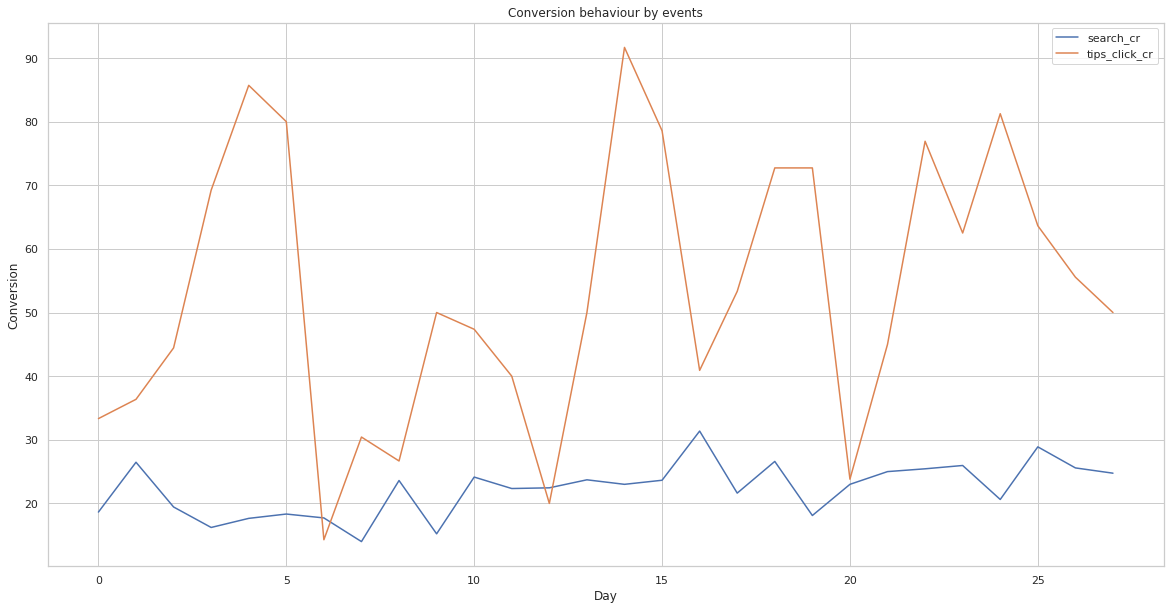

In [60]:
def get_cr_3(action):
    event_pivot = action.pivot_table(index =['session'], values = ['user_id'], aggfunc = ['nunique'])
    event_pivot = event_pivot.reset_index()
    event_pivot.columns = ['session','count_users_total']
    action_users = action[['user_id']].copy().drop_duplicates()
    df_show_contacts_result = show_contacts_query.merge(action_users, on='user_id', how = 'right')
    contacts_result_pivot = df_show_contacts_result.pivot_table(index =['session'], values = ['user_id'], aggfunc = ['nunique'])
    contacts_result_pivot = contacts_result_pivot.reset_index()
    contacts_result_pivot.columns = ['session','count_users_show_contacts']
    cr = contacts_result_pivot.merge(event_pivot, on='session', how = 'outer')
    cr['cr'] = ((cr['count_users_show_contacts']/cr['count_users_total'])*100).round(2)
    cr.drop(['session','count_users_show_contacts','count_users_total'], axis=1, inplace = True)
    return cr

search_cr = get_cr_3(df_search)
tips_click_cr = get_cr_3(df_tips_click)
action_cr = pd.concat([search_cr, tips_click_cr], axis=1)
action_cr.columns = ['search_cr','tips_click_cr']
action_cr.plot(figsize=(20, 10), grid=True)
plt.title('Conversion behaviour by events')
plt.xlabel('Day')
plt.ylabel('Conversion')
plt.show()

Users performed "tips_click" event perform statistically significant lower Conversion Rate in the target event than users performed "search" event.

## Conclusion

**Таким образом в ходе проекта**:

1) Data is processed and explored:
   - No gaps detected;
   - No duplicates detected;
   - Datatype coorrected;
   - Tables named properly;
   - Sources table & dataset log are merged;
   - Timeframe 7th October - 3rd November.
    
    
2) Evaluated metrics:
   - Retention rate;
   - Time spent in the App;
   - Events frequency;
   - Conversion to target event.

Time spent in the App is considered to be the base for users segmentation.


3) Data is divided into 4 groups by users, based on time they spent in the App in such a way, that the number of unique users in each group is approximately equal.

4) Retention Rate for each group is evaluated. Users that spent the most time in the App proved to show the best Retention over the timeframe.


5) Conversion to target event for each group is evaluated. Users that spent the most time in the App proved to show the best Conversion over the timeframe.


6) Groups defined based on the time spent in the App metric seem to show significant differences by both Retention Rate and Conversion.

7) Statistical hypotheses testing results:

    - Users from source "yandex" perform statistically significant lower Conversion Rate in the target event than users from the "google" source.     
    - Users performed "tips_click" event perform statistically significant lower Conversion Rate in the target event than users performed "search" event.
    

## Recommendations

Taking into consideration that:
   1) "Tips_cklick" event seems to be one of the least frequent, however Conversion in the target event is significantly higher.\
   2)  "Search" event is in the top-3 most frequent events, however the Conversion in the target event is significantly lower.

Following recommendations are proposed:
1) It seems like users are not quite interested in the recommended ads. However, if they meet the eye, the Conversion in the target event is significantly higher.
Reasons for that need to be analysed more thoroughly. Since "tips_show" is the most frequent event, it is recommended ads generation algorithm that should be revised and improved.


2) Users do use search quite frequently, however the Conversion in the target event is significantly lower. Thus the search results do not meet users' needs. Users that spend more time in the App tend to lash out more time for search in particular and, as a result, show higher Conversion in the target event.
Reasons to that need to be analysed more thoroughly: search parameters should be inspected and improved. In addition it seems that search history should be used for recommended ads generation.